## Previsão Salarial de Profissionais de TI
Usando a base da dados da pesquisa do Stack Overflow o objetivo é trabalhar os dados da base escolhendo os melhores features de modo a termos métricas que contribuem para uma previsão confiável de salários.

A escolha do modelo de machine learning será baseada nas opções inputadas do Optuna que testará diversas combinações de parâmetros de cada um dos modelos que ao final da análise nos indicará o modelo com a melhor métrica juntamente com os melhores parâmetros para que possamos aplicar no dataset de treinamento e de teste, validando assim a escolha.

In [530]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")


In [531]:
data = pd.read_csv('survey_results_public.csv')
data.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,TechDoc,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,BuyNewTool,BuildvsBuy,TechEndorse,Country,Currency,CompTotal,LanguageHaveWorkedWith,LanguageWantToWorkWith,LanguageAdmired,DatabaseHaveWorkedWith,DatabaseWantToWorkWith,DatabaseAdmired,PlatformHaveWorkedWith,PlatformWantToWorkWith,PlatformAdmired,WebframeHaveWorkedWith,WebframeWantToWorkWith,WebframeAdmired,EmbeddedHaveWorkedWith,EmbeddedWantToWorkWith,EmbeddedAdmired,MiscTechHaveWorkedWith,MiscTechWantToWorkWith,MiscTechAdmired,ToolsTechHaveWorkedWith,ToolsTechWantToWorkWith,ToolsTechAdmired,NEWCollabToolsHaveWorkedWith,NEWCollabToolsWantToWorkWith,NEWCollabToolsAdmired,OpSysPersonal use,OpSysProfessional use,OfficeStackAsyncHaveWorkedWith,OfficeStackAsyncWantToWorkWith,OfficeStackAsyncAdmired,OfficeStackSyncHaveWorkedWith,OfficeStackSyncWantToWorkWith,OfficeStackSyncAdmired,AISearchDevHaveWorkedWith,AISearchDevWantToWorkWith,AISearchDevAdmired,NEWSOSites,SOVisitFreq,SOAccount,SOPartFreq,SOHow,SOComm,AISelect,AISent,AIBen,AIAcc,AIComplex,AIToolCurrently Using,AIToolInterested in Using,AIToolNot interested in Using,AINextMuch more integrated,AINextNo change,AINextMore integrated,AINextLess integrated,AINextMuch less integrated,AIThreat,AIEthics,AIChallenges,TBranch,ICorPM,WorkExp,Knowledge_1,Knowledge_2,Knowledge_3,Knowledge_4,Knowledge_5,Knowledge_6,Knowledge_7,Knowledge_8,Knowledge_9,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,Frustration,ProfessionalTech,ProfessionalCloud,ProfessionalQuestion,Industry,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I have never visited Stack Overflow or the Sta...,NaN,NaN,NaN,NaN,NaN,Yes,Very favorable,Increase productivity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,API document(s) and/or SDK document(s);User gu...,20,17,"Developer, full-stack",NaN,NaN,NaN,NaN,NaN,United Kingdom of Great Britain and Northern I...,NaN,NaN,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Bash/Shell (all shells);Go;HTML/CSS;Java;JavaS...,Dynamodb;MongoDB;PostgreSQL,PostgreSQL,PostgreSQL,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Amazon Web Services (AWS);Heroku;Netlify,Express;Next.js;Node.js;React,Express;Htmx;Node.js;React;Remix,Express;Node.js;React,NaN,NaN,NaN,NaN,NaN,NaN,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,Docker;Homebrew;Kubernetes;npm;Vite;Webpack,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,PyCharm;Visual Studio Code;WebStorm,MacOS;Windows,MacOS,NaN,NaN,NaN,Microsoft Teams;Slack,Slack,Slack,NaN,NaN,NaN,Stack Overflow for Teams (private knowledge sh...,Multiple times per day,Yes,Multiple times per day,Quickly finding code solutions;Finding reliabl...,"Yes, definitely","No, and I don't plan to",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Individual contributor,17.0,Agree,Disagree,Agree,Agree,Agree,Neither agree nor disa

In [532]:
data.shape

(65437, 114)

In [533]:
data.columns.to_list()

['ResponseId',
 'MainBranch',
 'Age',
 'Employment',
 'RemoteWork',
 'Check',
 'CodingActivities',
 'EdLevel',
 'LearnCode',
 'LearnCodeOnline',
 'TechDoc',
 'YearsCode',
 'YearsCodePro',
 'DevType',
 'OrgSize',
 'PurchaseInfluence',
 'BuyNewTool',
 'BuildvsBuy',
 'TechEndorse',
 'Country',
 'Currency',
 'CompTotal',
 'LanguageHaveWorkedWith',
 'LanguageWantToWorkWith',
 'LanguageAdmired',
 'DatabaseHaveWorkedWith',
 'DatabaseWantToWorkWith',
 'DatabaseAdmired',
 'PlatformHaveWorkedWith',
 'PlatformWantToWorkWith',
 'PlatformAdmired',
 'WebframeHaveWorkedWith',
 'WebframeWantToWorkWith',
 'WebframeAdmired',
 'EmbeddedHaveWorkedWith',
 'EmbeddedWantToWorkWith',
 'EmbeddedAdmired',
 'MiscTechHaveWorkedWith',
 'MiscTechWantToWorkWith',
 'MiscTechAdmired',
 'ToolsTechHaveWorkedWith',
 'ToolsTechWantToWorkWith',
 'ToolsTechAdmired',
 'NEWCollabToolsHaveWorkedWith',
 'NEWCollabToolsWantToWorkWith',
 'NEWCollabToolsAdmired',
 'OpSysPersonal use',
 'OpSysProfessional use',
 'OfficeStackAsyncHa

In [534]:
data['Industry'].value_counts()

Industry
Software Development                          11918
Other:                                         3077
Fintech                                        1641
Internet, Telecomm or Information Services     1629
Banking/Financial Services                     1371
Healthcare                                     1277
Manufacturing                                  1265
Retail and Consumer Services                   1264
Government                                      962
Media & Advertising Services                    894
Higher Education                                890
Transportation, or Supply Chain                 859
Computer Systems Design and Services            844
Energy                                          578
Insurance                                       389
Name: count, dtype: int64

In [535]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


In [536]:
data['Age'].value_counts()

Age
25-34 years old       23911
35-44 years old       14942
18-24 years old       14098
45-54 years old        6249
55-64 years old        2575
Under 18 years old     2568
65 years or older       772
Prefer not to say       322
Name: count, dtype: int64

In [ ]:
(data['Industry'].notna() & data['Country'].notna() & data['EdLevel'].notna() & data['Age'].notna() & data['YearsCodePro'].notna() & data['ConvertedCompYearly'].notna()).sum()

np.int64(15942)

In [538]:
data = data[['Country', 'EdLevel', 'YearsCodePro', 'Employment', 'ConvertedCompYearly', 'Age', 'Industry']]
data = data.rename({'ConvertedCompYearly': 'Salary'}, axis=1)
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Age,Industry
0,United States of America,Primary/elementary school,NaN,"Employed, full-time",NaN,Under 18 years old,NaN
1,United Kingdom of Great Britain and Northern I...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",17,"Employed, full-time",NaN,35-44 years old,NaN
2,United Kingdom of Great Britain and Northern I...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",27,"Employed, full-time",NaN,45-54 years old,NaN
3,Canada,Some college/university study without earning ...,NaN,"Student, full-time",NaN,18-24 years old,NaN
4,Norway,"Secondary school (e.g. American high school, G...",NaN,"Student, full-time",NaN,18-24 years old,NaN


In [539]:
data['Country'].value_counts()

Country
United States of America                                11095
Germany                                                  4947
India                                                    4231
United Kingdom of Great Britain and Northern Ireland     3224
Ukraine                                                  2672
                                                        ...  
Micronesia, Federated States of...                          1
Nauru                                                       1
Chad                                                        1
Djibouti                                                    1
Solomon Islands                                             1
Name: count, Length: 185, dtype: int64

In [540]:
data['Country'] = data['Country'].replace(to_replace='United Kingdom of Great Britain and Northern Ireland', value='UK' )
data['Country'].value_counts()

Country
United States of America              11095
Germany                                4947
India                                  4231
UK                                     3224
Ukraine                                2672
                                      ...  
Micronesia, Federated States of...        1
Nauru                                     1
Chad                                      1
Djibouti                                  1
Solomon Islands                           1
Name: count, Length: 185, dtype: int64

In [541]:
data.isnull().sum()

Country          6507
EdLevel          4653
YearsCodePro    13827
Employment          0
Salary          42002
Age                 0
Industry        36579
dtype: int64

In [542]:
data = data[data['Salary'].notnull()]
data.head()

,Country,EdLevel,YearsCodePro,Employment,Salary,Age,Industry
72,Pakistan,"Secondary school (e.g. American high school, G...",1,"Employed, full-time;Student, full-time;Indepen...",7322.0,18-24 years old,Software Development
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,"Employed, full-time",30074.0,25-34 years old,NaN
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,"Employed, full-time",91295.0,35-44 years old,Computer Systems Design and Services
385,France,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",17,"Independent contractor, freelancer, or self-em...",53703.0,35-44 years old,NaN
389,United States of America,Some college/university study without earning ...,7,"Employed, full-time;Student, part-time",110000.0,25-34 years old,"Transportation, or Supply Chain"


In [543]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23435 entries, 72 to 41187
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country       23435 non-null  object 
 1   EdLevel       23435 non-null  object 
 2   YearsCodePro  23345 non-null  object 
 3   Employment    23435 non-null  object 
 4   Salary        23435 non-null  float64
 5   Age           23435 non-null  object 
 6   Industry      15976 non-null  object 
dtypes: float64(1), object(6)
memory usage: 1.4+ MB


In [544]:
data.isnull().sum()

Country            0
EdLevel            0
YearsCodePro      90
Employment         0
Salary             0
Age                0
Industry        7459
dtype: int64

In [545]:
data['Industry'].fillna('Other:', inplace=True)
data['Industry']

72                             Software Development
374                                          Other:
379            Computer Systems Design and Services
385                                          Other:
389                 Transportation, or Supply Chain
                            ...                    
41180                          Software Development
41184                                    Government
41185                                        Other:
41186                          Software Development
41187    Internet, Telecomm or Information Services
Name: Industry, Length: 23435, dtype: object

In [546]:
data['Industry'].value_counts()

Industry
Other:                                        9179
Software Development                          6455
Fintech                                        948
Internet, Telecomm or Information Services     913
Banking/Financial Services                     760
Healthcare                                     744
Retail and Consumer Services                   711
Manufacturing                                  663
Government                                     534
Media & Advertising Services                   518
Transportation, or Supply Chain                499
Higher Education                               497
Computer Systems Design and Services           480
Energy                                         313
Insurance                                      221
Name: count, dtype: int64

In [547]:
data = data.dropna()
data.isnull().sum()

Country         0
EdLevel         0
YearsCodePro    0
Employment      0
Salary          0
Age             0
Industry        0
dtype: int64

In [548]:
data.shape

(23345, 7)

In [549]:
data['Employment'].value_counts()

Employment
Employed, full-time                                                                                                                                                                                                     17527
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                                                                                                 1690
Independent contractor, freelancer, or self-employed                                                                                                                                                                     1616
Employed, part-time                                                                                                                                                                                                       430
Employed, full-time;Student, part-time                                                               

In [550]:
data = data[data['Employment'] == 'Employed, full-time']
data = data.drop(columns='Employment', axis=1)
data.head()

,Country,EdLevel,YearsCodePro,Salary,Age,Industry
374,Austria,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",6,30074.0,25-34 years old,Other:
379,Turkey,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",6,91295.0,35-44 years old,Computer Systems Design and Services
392,UK,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",18,161044.0,35-44 years old,Retail and Consumer Services
395,UK,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",25,121018.0,45-54 years old,Other:
398,United States of America,Some college/university study without earning ...,30,195000.0,45-54 years old,Healthcare


In [551]:
data.shape

(17527, 6)

In [552]:
data['Country'].value_counts()

Country
United States of America    3903
Germany                     1491
UK                          1141
Ukraine                     1017
India                        836
                            ... 
Botswana                       1
Barbados                       1
Senegal                        1
Suriname                       1
Mali                           1
Name: count, Length: 155, dtype: int64

In [553]:
def shorten_categories(categories, cutoff):
    categorical_map = {}
    for i in range(len(categories)):
        if categories.values[i] >= cutoff:
            categorical_map[categories.index[i]] = categories.index[i]
        else:
            categorical_map[categories.index[i]] = 'Other'
    return categorical_map

In [554]:
country_map = shorten_categories(data.Country.value_counts(), 200)
data['Country'] = data['Country'].map(country_map)
data.Country.value_counts()

Country
Other                       4457
United States of America    3903
Germany                     1491
UK                          1141
Ukraine                     1017
India                        836
France                       719
Canada                       684
Brazil                       457
Spain                        431
Italy                        414
Netherlands                  406
Australia                    400
Sweden                       370
Poland                       324
Switzerland                  268
Austria                      209
Name: count, dtype: int64

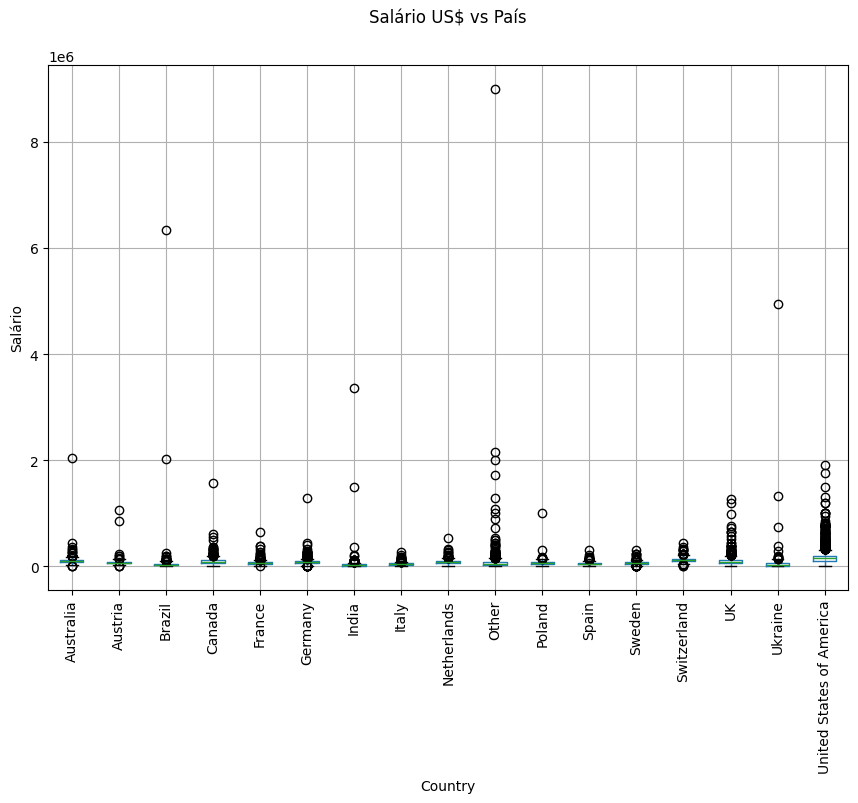

In [555]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
data.boxplot('Salary',  'Country', ax=ax)
plt.suptitle('Salário US$ vs País')
plt.title('')
plt.ylabel('Salário')
plt.xticks(rotation=90)
plt.show()

In [ ]:
data = data[data['Salary'] <= 250000]
data = data[data['Salary'] >= 10000]

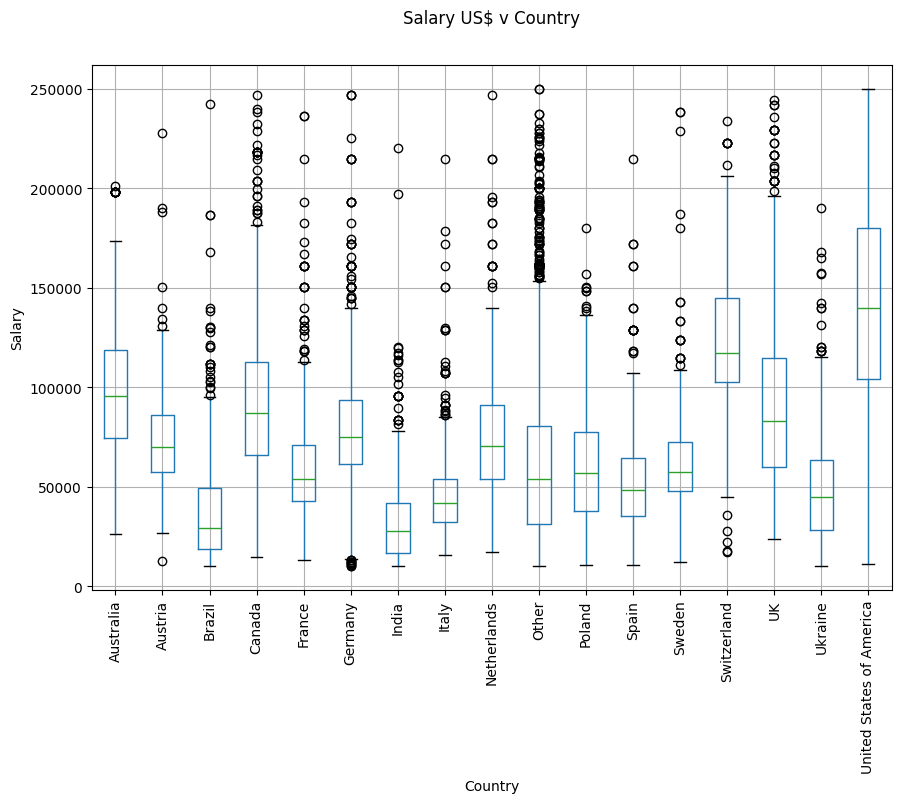

In [557]:
fig, ax = plt.subplots(1,1, figsize=(10,7))
data.boxplot('Salary',  'Country', ax=ax)
plt.suptitle('Salary US$ v Country')
plt.title('')
plt.ylabel('Salary')
plt.xticks(rotation=90)
plt.show()

In [558]:
data['YearsCodePro'].unique()

array(['6', '18', '25', '30', '20', '50', '27', '1', '15', '11', '23',
       '17', '10', '8', '12', '26', '9', '40', '4', '14', '7', '22', '28',
       '44', '13', '16', '3', '35', '5', '31', '41', '36',
       'Less than 1 year', '24', '2', '38', '32', '21', '19', '34', '29',
       '43', '33', '45', '37', '42', '39', '46', '49', '48', '47'],
      dtype=object)

In [559]:
def clean_experience(x):
    if x == 'Less than 1 year':
        return 0.5
    return float (x)

data['YearsCodePro'] = data['YearsCodePro'].apply(clean_experience)

In [560]:
data['EdLevel'].unique()

array(['Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Primary/elementary school',
       'Something else'], dtype=object)

In [561]:
def clean_education(x):
    if 'Bachelor’s degree' in x:
        return 'Bachelor’s degree'
    if 'Master’s degree' in x:
        return 'Master’s degree'
    if 'Professional degree' in x:
        return 'Post Grad'
    return 'Less than a Bachelors'

data['EdLevel'] = data['EdLevel'].apply(clean_education)
data['EdLevel'].unique()

array(['Post Grad', 'Master’s degree', 'Less than a Bachelors',
       'Bachelor’s degree'], dtype=object)

In [562]:
set(data['Industry'])

{'Banking/Financial Services',
 'Computer Systems Design and Services',
 'Energy',
 'Fintech',
 'Government',
 'Healthcare',
 'Higher Education',
 'Insurance',
 'Internet, Telecomm or Information Services',
 'Manufacturing',
 'Media & Advertising Services',
 'Other:',
 'Retail and Consumer Services',
 'Software Development',
 'Transportation, or Supply Chain'}

In [563]:
data.head()

,Country,EdLevel,YearsCodePro,Salary,Age,Industry
374,Austria,Post Grad,6.0,30074.0,25-34 years old,Other:
379,Other,Master’s degree,6.0,91295.0,35-44 years old,Computer Systems Design and Services
392,UK,Post Grad,18.0,161044.0,35-44 years old,Retail and Consumer Services
395,UK,Master’s degree,25.0,121018.0,45-54 years old,Other:
398,United States of America,Less than a Bachelors,30.0,195000.0,45-54 years old,Healthcare


In [564]:
data['EdLevel_Country'] = data['EdLevel'] + '_' + data['Country']
data['Country_Industry'] = data['Country'] + '_' + data['Industry']
data['YearsCodePro_Age'] = data['YearsCodePro'].astype(str) + '_' + data['Age']
data['YearsCodePro_Industry'] = data['YearsCodePro'].astype(str) + '_' + data['Industry']
data['Country_YearCodePro'] = data['Country'] + '_' + data['YearsCodePro'].astype(str)
data['EdLevel_YearsCodePro'] = data['EdLevel'] + '_' + data['YearsCodePro'].astype(str)
data['Country_Age'] = data['Country'] + '_' + data['Age']

In [565]:
data.head()

,Country,EdLevel,YearsCodePro,Salary,Age,Industry,EdLevel_Country,Country_Industry,YearsCodePro_Age,YearsCodePro_Industry,Country_YearCodePro,EdLevel_YearsCodePro,Country_Age
374,Austria,Post Grad,6.0,30074.0,25-34 years old,Other:,Post Grad_Austria,Austria_Other:,6.0_25-34 years old,6.0_Other:,Austria_6.0,Post Grad_6.0,Austria_25-34 years old
379,Other,Master’s degree,6.0,91295.0,35-44 years old,Computer Systems Design and Services,Master’s degree_Other,Other_Computer Systems Design and Services,6.0_35-44 years old,6.0_Computer Systems Design and Services,Other_6.0,Master’s degree_6.0,Other_35-44 years old
392,UK,Post Grad,18.0,161044.0,35-44 years old,Retail and Consumer Services,Post Grad_UK,UK_Retail and Consumer Services,18.0_35-44 years old,18.0_Retail and Consumer Services,UK_18.0,Post Grad_18.0,UK_35-44 years old
395,UK,Master’s degree,25.0,121018.0,45-54 years old,Other:,Master’s degree_UK,UK_Other:,25.0_45-54 years old,25.0_Other:,UK_25.0,Master’s degree_25.0,UK_45-54 years old
398,United States of America,Less than a Bachelors,30.0,195000.0,45-54 years old,Healthcare,Less than a Bachelors_United States of America,United States of America_Healthcare,30.0_45-54 years old,30.0_Healthcare,United States of America_30.0,Less than a Bachelors_30.0,United States of America_45-54 years old


In [566]:
data.columns.to_list()

['Country',
 'EdLevel',
 'YearsCodePro',
 'Salary',
 'Age',
 'Industry',
 'EdLevel_Country',
 'Country_Industry',
 'YearsCodePro_Age',
 'YearsCodePro_Industry',
 'Country_YearCodePro',
 'EdLevel_YearsCodePro',
 'Country_Age']

In [567]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

encoder_country = LabelEncoder()
data['Country'] = encoder_country.fit_transform(data['Country'])

encoder_education = LabelEncoder()
data['EdLevel'] = encoder_education.fit_transform(data['EdLevel'])

encoder_age = LabelEncoder()
data['Age'] = encoder_age.fit_transform(data['Age'])

encoder_industry = LabelEncoder()
data['Industry'] = encoder_industry.fit_transform(data['Industry'])

encoder_education_country = TargetEncoder(handle_unknown='value' , handle_missing='value')
data['EdLevel_Country'] = encoder_education_country.fit_transform(data['EdLevel_Country'], data['Salary'])

encoder_country_industry = TargetEncoder(handle_unknown='value' , handle_missing='value')
data['Country_Industry'] = encoder_country_industry.fit_transform(data['Country_Industry'], data['Salary'])

encoder_yearscodepro_age =TargetEncoder(handle_unknown='value' , handle_missing='value')
data['YearsCodePro_Age'] = encoder_yearscodepro_age.fit_transform(data['YearsCodePro_Age'], data['Salary'])

encoder_yearscodepro_industry =TargetEncoder(handle_unknown='value' , handle_missing='value')
data['YearsCodePro_Industry'] = encoder_yearscodepro_industry.fit_transform(data['YearsCodePro_Industry'], data['Salary'])

encoder_coutry_yearscodepro =TargetEncoder(handle_unknown='value' , handle_missing='value')
data['Country_YearCodePro'] = encoder_coutry_yearscodepro.fit_transform(data['Country_YearCodePro'], data['Salary'])

encoder_education_yearscodepro =TargetEncoder(handle_unknown='value' , handle_missing='value')
data['EdLevel_YearsCodePro'] = encoder_education_yearscodepro.fit_transform(data['EdLevel_YearsCodePro'], data['Salary'])

encoder_countr_age =TargetEncoder(handle_unknown='value' , handle_missing='value')
data['Country_Age'] = encoder_countr_age.fit_transform(data['Country_Age'], data['Salary'])

In [568]:
data.head(5)

,Country,EdLevel,YearsCodePro,Salary,Age,Industry,EdLevel_Country,Country_Industry,YearsCodePro_Age,YearsCodePro_Industry,Country_YearCodePro,EdLevel_YearsCodePro,Country_Age
374,1,3,6.0,30074.0,1,11,80499.383450,74964.777293,76011.149635,79177.350267,78049.333007,97571.599349,71043.762979
379,9,2,6.0,91295.0,2,1,68417.137363,54864.812886,89004.304881,83598.892518,56803.592199,75505.622419,74670.281190
392,14,3,18.0,161044.0,2,12,92974.108079,86591.734137,111092.497657,93162.198076,96097.591915,82788.378907,100046.873457
395,14,2,25.0,121018.0,3,11,96117.898601,89460.147806,110019.522443,112745.158864,101065.893558,96137.993969,99159.559084
398,16,1,30.0,195000.0,3,5,134250.395973,145423.963220,117775.396800,89608.548493,166245.464454,102629.479048,158517.348936


In [569]:
X = data.drop(columns='Salary', axis=1)
y = data['Salary']

In [570]:
from sklearn.model_selection import train_test_split

In [571]:
data.shape

(15536, 13)

In [593]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, train_size=5000, test_size=.20)

In [594]:
import optuna
from sklearn.model_selection import cross_val_score, KFold
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor


def objective(trial):
    model_name = trial.suggest_categorical("model", [
        "XGBoost", "LightGBM", "RandomForest", "Ridge", "Lasso", "ElasticNet", "DecisionTreeRegressor"])

    if model_name == "XGBoost":
        model = XGBRegressor(
            n_estimators=trial.suggest_int("xgb_n_estimators", 100, 1000),
            learning_rate=trial.suggest_float("xgb_learning_rate", 0.01, 0.3),
            max_depth=trial.suggest_int("xgb_max_depth", 3, 10),
            subsample=trial.suggest_float("xgb_subsample", 0.5, 1.0),
            colsample_bytree=trial.suggest_float("xgb_colsample_bytree", 0.5, 1.0),
            reg_alpha=trial.suggest_float("xgb_reg_alpha", 1e-8, 10.0, log=True),
            reg_lambda=trial.suggest_float("xgb_reg_lambda", 1e-8, 10.0, log=True),
            random_state=42,
            n_jobs=-1
        )

    elif model_name == "LightGBM":
        model = LGBMRegressor(
            n_estimators=trial.suggest_int("lgb_n_estimators", 100, 1000),
            learning_rate=trial.suggest_float("lgb_learning_rate", 0.01, 0.3),
            num_leaves=trial.suggest_int("lgb_num_leaves", 20, 300),
            subsample=trial.suggest_float("lgb_subsample", 0.5, 1.0),
            colsample_bytree=trial.suggest_float("lgb_colsample_bytree", 0.5, 1.0),
            reg_alpha=trial.suggest_float("lgb_reg_alpha", 1e-8, 10.0, log=True),
            reg_lambda=trial.suggest_float("lgb_reg_lambda", 1e-8, 10.0, log=True),
            random_state=42,
            n_jobs=-1
        )

    elif model_name == "RandomForest":
        model = RandomForestRegressor(
            n_estimators=trial.suggest_int("rf_n_estimators", 100, 1000),
            max_depth=trial.suggest_int("rf_max_depth", 3, 30),
            min_samples_split=trial.suggest_int("rf_min_samples_split", 2, 20),
            min_samples_leaf=trial.suggest_int("rf_min_samples_leaf", 1, 10),
            max_features=trial.suggest_float("rf_max_features", 0.2, 1.0),
            random_state=42,
            n_jobs=-1
        )

    elif model_name == "Ridge":
        model = Ridge(
            alpha=trial.suggest_float("ridge_alpha", 1e-4, 100.0, log=True)
        )

    elif model_name == "Lasso":
        model = Lasso(
            alpha=trial.suggest_float("lasso_alpha", 1e-4, 100.0, log=True)
        )

    elif model_name == "ElasticNet":
        model = ElasticNet(
            alpha=trial.suggest_float("en_alpha", 1e-4, 100.0, log=True),
            l1_ratio=trial.suggest_float("en_l1_ratio", 0.0, 1.0)
        )

    elif model_name == 'DecisionTreeRegressor':
        model = DecisionTreeRegressor(
            max_depth=trial.suggest_int('dt_max_depth', 3, 30),
            min_samples_split=trial.suggest_int('dt_min_samples_split', 2, 20),
            min_samples_leaf=trial.suggest_int('dt_min_samples_leaf', 1, 10),
            max_features=trial.suggest_float('dt_max_features', 0.2, 1.0),
            random_state=42
        )

    cv = KFold(n_splits=3, shuffle=True, random_state=42)
    score = cross_val_score(model, X_train, y_train, cv=cv,
                            scoring="neg_mean_absolute_error", n_jobs=-1)

    return score.mean()


study = optuna.create_study(direction="minimize", pruner=optuna.pruners.HyperbandPruner())
study.optimize(objective, n_trials=150)

df_trials = study.trials_dataframe()
df_trials.to_csv("optuna_trials_results_regression_dep.csv", index=False)

print("Best Model:", study.best_params["model"])
print("Best Value:", study.best_value)
print("Best Hyperparameters:", study.best_params)


[I 2025-04-04 14:59:41,252] A new study created in memory with name: no-name-699cab0a-072c-4c92-aeb8-97c117698230
[I 2025-04-04 14:59:49,656] Trial 0 finished with value: -24547.249969312874 and parameters: {'model': 'Ridge', 'ridge_alpha': 0.00023903951625206513}. Best is trial 0 with value: -24547.249969312874.
[I 2025-04-04 14:59:51,215] Trial 1 finished with value: -24547.933222336662 and parameters: {'model': 'Lasso', 'lasso_alpha': 55.229882772113776}. Best is trial 1 with value: -24547.933222336662.
[I 2025-04-04 14:59:52,580] Trial 2 finished with value: -24547.249967859145 and parameters: {'model': 'Ridge', 'ridge_alpha': 0.00032922375835405204}. Best is trial 1 with value: -24547.933222336662.
[I 2025-04-04 14:59:57,265] Trial 3 finished with value: -24535.47912637871 and parameters: {'model': 'RandomForest', 'rf_n_estimators': 650, 'rf_max_depth': 17, 'rf_min_samples_split': 14, 'rf_min_samples_leaf': 4, 'rf_max_features': 0.9277886322220166}. Best is trial 1 with value: -24

Best Model: XGBoost
Best Value: -45300.14065674174
Best Hyperparameters: {'model': 'XGBoost', 'xgb_n_estimators': 920, 'xgb_learning_rate': 0.291117626896048, 'xgb_max_depth': 10, 'xgb_subsample': 0.5526845378607459, 'xgb_colsample_bytree': 0.7507745151237583, 'xgb_reg_alpha': 1.3047553331223084e-08, 'xgb_reg_lambda': 1.4243932394870224e-06}


In [595]:
# Usando o melhor modelo e generalizando para toda a base
# Best Model: XGBoost
# Best Value: -45300.14065674174
# Best Hyperparameters: {'model': 'XGBoost', 'xgb_n_estimators': 920, 'xgb_learning_rate': 0.291117626896048, 'xgb_max_depth': 10, 'xgb_subsample': 0.5526845378607459, 'xgb_colsample_bytree': 0.7507745151237583, 'xgb_reg_alpha': 1.3047553331223084e-08, 'xgb_reg_lambda': 1.4243932394870224e-06}
from xgboost import XGBRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)
model = XGBRegressor(n_estimators = 920, learning_rate = 0.291117626896048, max_depth=10, xgb_subsample=0.5526845378607459, colsample_bytree=0.7507745151237583, reg_alpha=1.3047553331223084e-08, reg_lambda=1.4243932394870224e-06)
model.fit(X_train, y_train)
pred = model.predict(X_train)

In [596]:
from sklearn.metrics import r2_score, mean_absolute_error, root_mean_squared_error, mean_absolute_percentage_error

In [597]:
mae_dep = mean_absolute_error(y_train, pred)
r2_dep = r2_score(y_train, pred)
rmse_dep = root_mean_squared_error(y_train, pred)
mape_dep = mean_absolute_percentage_error(y_train, pred)

actual_mean = actual_mean = np.mean(y_train)
actual_std = np.std(pred)
predicted_mean = np.mean(pred)
predicted_std = np.std(pred)


print(f"Final Model MAE: {mae_dep:.4f}")
print(f"Final Model R2 SCORE: {r2_dep:.4f}")
print(f"Final Model RMSE: {rmse_dep:.4f}")
print(f"Actual Salary - Mean: {actual_mean:.2f}, Std: {actual_std:.2f}")
print(f"Predicted Salary - Mean: {predicted_mean:.2f}, Std: {predicted_std:.2f}")


Final Model MAE: 12742.7455
Final Model R2 SCORE: 0.8085
Final Model RMSE: 22716.1764
Actual Salary - Mean: 84771.93, Std: 46681.58
Predicted Salary - Mean: 84771.93, Std: 46681.58


In [598]:
pred_test = model.predict(X_test)

In [599]:
mae_dep_test = mean_absolute_error(y_test, pred_test)
r2_dep_test = r2_score(y_test, pred_test)
rmse_dep_test = root_mean_squared_error(y_test, pred_test)
mape_dep_test = mean_absolute_percentage_error(y_test, pred_test)

actual_mean_test = actual_mean = np.mean(y_test)
actual_std_test = np.std(pred_test)
predicted_mean_test = np.mean(pred_test)
predicted_std_test = np.std(pred_test)


print(f"Final Model MAE: {mae_dep_test:.4f}")
print(f"Final Model R2 SCORE: {r2_dep_test:.4f}")
print(f"Final Model RMSE: {rmse_dep_test:.4f}")
print(f"Actual Salary - Mean: {actual_mean_test:.2f}, Std: {actual_std_test:.2f}")
print(f"Predicted Salary - Mean: {predicted_mean_test:.2f}, Std: {predicted_std_test:.2f}")

Final Model MAE: 27620.7650
Final Model R2 SCORE: 0.4415
Final Model RMSE: 38454.0818
Actual Salary - Mean: 84807.80, Std: 45011.20
Predicted Salary - Mean: 85598.27, Std: 45011.20


In [600]:
data.head()

,Country,EdLevel,YearsCodePro,Salary,Age,Industry,EdLevel_Country,Country_Industry,YearsCodePro_Age,YearsCodePro_Industry,Country_YearCodePro,EdLevel_YearsCodePro,Country_Age
374,1,3,6.0,30074.0,1,11,80499.383450,74964.777293,76011.149635,79177.350267,78049.333007,97571.599349,71043.762979
379,9,2,6.0,91295.0,2,1,68417.137363,54864.812886,89004.304881,83598.892518,56803.592199,75505.622419,74670.281190
392,14,3,18.0,161044.0,2,12,92974.108079,86591.734137,111092.497657,93162.198076,96097.591915,82788.378907,100046.873457
395,14,2,25.0,121018.0,3,11,96117.898601,89460.147806,110019.522443,112745.158864,101065.893558,96137.993969,99159.559084
398,16,1,30.0,195000.0,3,5,134250.395973,145423.963220,117775.396800,89608.548493,166245.464454,102629.479048,158517.348936


In [601]:
# Create X_check with each element as a separate item in a list, not a numpy array yet
input_data = [["United States of America", "Master’s degree", 15, '25-34 years old',  'Computer Systems Design and Services',]]

# Transform each categorical feature
input_data_transformed = input_data.copy()
input_data_transformed[0][0] = encoder_country.transform([input_data[0][0]])[0]
input_data_transformed[0][1] = encoder_education.transform([input_data[0][1]])[0]
input_data_transformed[0][3] = encoder_age.transform([input_data[0][3]])[0]
input_data_transformed[0][4] = encoder_industry.transform([input_data[0][4]])[0]


education_country = f'{input_data_transformed[0][1]}_{input_data_transformed[0][0]}'
try:
    education_country_encoded = encoder_education_country.transform([education_country])[0]

except KeyError:
    education_country_encoded = encoder_education_country._mean

country_industry = f'{input_data_transformed[0][0]}_{input_data_transformed[0][4]}'
try:
    country_industry_encoded = encoder_country_industry.transform([country_industry])[0]
except KeyError:
    country_industry_encoded = encoder_country_industry._mean

yearscodepro_age = f'{input_data_transformed[0][2]}_{input_data_transformed[0][3]}'
try:
    yearscodepro_age_encoded = encoder_yearscodepro_age.transform([yearscodepro_age])[0]
except KeyError:
    yearscodepro_age_encoded = encoder_yearscodepro_age._mean

#YearsCodePro_Industry	
yearscodepro_industry = f'{input_data_transformed[0][2]}_{input_data_transformed[0][4]}'
try:
    yearscodepro_industry = encoder_yearscodepro_industry.transform([yearscodepro_industry])[0]
except KeyError:
    yearscodepro_industry = encoder_yearscodepro_industry._mean

#Country_YearCodePro
country_yearscodepro = f'{input_data_transformed[0][0]}_{input_data_transformed[0][2]}'
try:
    country_yearscodepro = encoder_coutry_yearscodepro.transform([country_yearscodepro])[0]
except KeyError:
    country_yearscodepro = encoder_coutry_yearscodepro._mean	

#EdLevel_YearsCodePro
education_yearcodepro = f'{input_data_transformed[0][1]}_{input_data_transformed[0][2]}'
try:
    education_yearcodepro = encoder_education_yearscodepro.transform([education_yearcodepro])[0]
except KeyError:
    education_yearcodepro = encoder_education_yearscodepro._mean	

#Country_Age
country_age = f'{input_data_transformed[0][0]}_{input_data_transformed[0][3]}'
try:
    country_age = encoder_countr_age.transform([country_age])[0]
except KeyError:
    country_age = encoder_countr_age._mean	


input_data_transformed[0].append(education_country_encoded)
input_data_transformed[0].append(country_industry_encoded)
input_data_transformed[0].append(yearscodepro_age_encoded)
input_data_transformed[0].append(yearscodepro_industry)
input_data_transformed[0].append(country_yearscodepro)
input_data_transformed[0].append(education_yearcodepro)
input_data_transformed[0].append(country_age)

# Now convert to numpy array and to float
input_data_transformed = np.array(input_data_transformed, dtype=float)

In [602]:
encoder_education_country._mean

np.float64(84779.10781410917)

In [603]:
input_data_transformed

array([[1.60000000e+01, 2.00000000e+00, 1.50000000e+01, 1.00000000e+00,
        1.00000000e+00, 8.47791078e+04, 8.47791078e+04, 8.47791078e+04,
        8.47791078e+04, 8.47791078e+04, 8.47791078e+04, 8.47791078e+04]])

In [604]:
y_check = model.predict(input_data_transformed)
y_check[0]

np.float32(88016.06)

In [605]:
import pickle

In [606]:
data_save = {'model': model, 'le_country': encoder_country, 'le_education':encoder_education, 'le_age':encoder_age, 'le_industry':encoder_industry, 
             'education_country': encoder_education_country, 'country_industry':encoder_country_industry, 'yearcode_age': encoder_yearscodepro_age, 'yearcode_industry': encoder_yearscodepro_industry, 'country_yearscode': encoder_coutry_yearscodepro, 'education_yearscode': encoder_education_yearscodepro, 'country_age': encoder_countr_age}
with open('pkl_files/regressor.pkl', 'wb') as file:
    pickle.dump(data_save, file)

In [607]:
with open('pkl_files/regressor.pkl', 'rb') as file:
    data_load = pickle.load(file) 

regressor_loaded = data_load['model']
le_country = data_load['le_country']
le_education = data_load['le_education']
le_age = data_load['le_age']
le_industry = data_load['le_industry']
ed_co = data_load['education_country']
co_ind = data_load['country_industry']
year_age = data_load['yearcode_age']
year_ind = data_load['yearcode_industry']
co_years = data_load['country_yearscode']
ed_years = data_load['education_yearscode']
co_age = data_load['country_age']

In [608]:
y_pred_cross = regressor_loaded.predict(input_data_transformed)
y_pred_cross

array([88016.06], dtype=float32)